In [1]:
#Installation of required package

!pip install -q datascience
!pip install -q pandas-profiling

!pip install -q --upgrade pandas-profiling

In [1]:
import pandas as pd
import pandas_profiling
from pandas_profiling import ProfileReport
import numpy as ns
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
import scipy as sc

# Initial Data Read and View Samples

In [2]:
fb_data = pd.read_csv(filepath_or_buffer = 'https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/facebook_data.csv')
 

In [6]:
shape=print(fb_data.shape)

(99003, 15)


In [7]:
fb_data.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


In [8]:
fb_data.tail()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
98998,1268299,68,4,1945,4,female,541.0,2118,341,3996,18089,3505,11887,491,6202
98999,1256153,18,12,1995,3,female,21.0,1968,1720,4401,13412,4399,10592,2,2820
99000,1195943,15,10,1998,5,female,111.0,2002,1524,11959,12554,11959,11462,0,1092
99001,1468023,23,11,1990,4,female,416.0,2560,185,4506,6516,4506,5760,0,756
99002,1397896,39,15,1974,5,female,397.0,2049,768,9410,12443,9410,9530,0,2913


In [9]:
fb_data.sample(10)

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
40737,1822417,18,8,1995,8,male,624.0,61,44,43,21,15,21,28,0
42724,1361616,53,21,1960,1,male,639.0,65,46,2,0,2,0,0,0
83353,1777131,22,22,1991,10,male,653.0,317,194,6,3,0,1,6,2
98169,1329365,19,4,1994,5,male,938.0,2941,1579,29,3916,27,2461,2,1455
70367,1426339,19,4,1994,8,female,399.0,181,31,2,19,2,13,0,6
85988,1828394,23,25,1990,2,female,404.0,350,256,560,403,560,341,0,62
18660,1971505,48,25,1965,3,female,1237.0,22,2,0,8,0,4,0,4
10165,1903689,59,24,1954,5,male,505.0,10,10,1,0,1,0,0,0
56924,2189569,57,5,1956,5,female,777.0,107,75,69,68,66,59,3,9
96858,1704599,17,11,1996,11,female,542.0,1257,870,1211,1355,1211,1207,0,148


# Data Infromation

In [10]:
fb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   userid                 99003 non-null  int64  
 1   age                    99003 non-null  int64  
 2   dob_day                99003 non-null  int64  
 3   dob_year               99003 non-null  int64  
 4   dob_month              99003 non-null  int64  
 5   gender                 98828 non-null  object 
 6   tenure                 99001 non-null  float64
 7   friend_count           99003 non-null  int64  
 8   friendships_initiated  99003 non-null  int64  
 9   likes                  99003 non-null  int64  
 10  likes_received         99003 non-null  int64  
 11  mobile_likes           99003 non-null  int64  
 12  mobile_likes_received  99003 non-null  int64  
 13  www_likes              99003 non-null  int64  
 14  www_likes_received     99003 non-null  int64  
dtypes:

# Data Describe 

In [11]:
fb_data.describe()

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,9.900300e+04,99003.000000,99003.000000,99003.000000,99003.000000,99001.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000
mean,1.597045e+06,37.280224,14.530408,1975.719776,6.283365,537.887375,196.350787,107.452471,156.078785,142.689363,106.116300,84.120491,49.962425,58.568831
std,3.440592e+05,22.589748,9.015606,22.589748,3.529672,457.649874,387.304229,188.786951,572.280681,1387.919613,445.252985,839.889444,285.560152,601.416348
min,1.000008e+06,13.000000,1.000000,1900.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.298806e+06,20.000000,7.000000,1963.000000,3.000000,226.000000,31.000000,17.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.596148e+06,28.000000,14.000000,1985.000000,6.000000,412.000000,82.000000,46.000000,11.000000,8.000000,4.000000,4.000000,0.000000,2.000000
75%,1.895744e+06,50.000000,22.000000,1993.000000,9.000000,675.000000,206.000000,117.000000,81.000000,59.000000,46.000000,33.000000,7.000000,20.000000
max,2.193542e+06,113.000000,31.000000,2000.000000,12.000000,3139.000000,4923.000000,4144.000000,25111.000000,261197.000000,25111.000000,138561.000000,14865.000000,129953.000000


# Data Pre-profiling

In [12]:
pre_profile = pandas_profiling.ProfileReport(fb_data)
pre_profile.to_file(output_file="Profiling_before_processing.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# <a name = Section6></a>
# **6. Data Pre-Processing**
---

- This section is emphasised on performing data manipulation over unstructured data for further processing and analysis.

- To modify unstructured data to strucuted data you need to verify and manipulate the integrity of the data by:
  - Handling missing data,

  - Handling redundant data,

  - Handling inconsistent data,

  - Handling outliers,

  - Handling typos

In [13]:
duplicate_data=fb_data[fb_data.duplicated()]
print("There is {} data is duplicated out of {}".format(duplicate_data.shape,fb_data.shape))

There is (0, 15) data is duplicated out of (99003, 15)


In [ ]:
#Observation :Gender has 0.2%  missing values & Tenure has only Two value is missing

In [14]:
fb_data.isnull().sum()

userid                     0
age                        0
dob_day                    0
dob_year                   0
dob_month                  0
gender                   175
tenure                     2
friend_count               0
friendships_initiated      0
likes                      0
likes_received             0
mobile_likes               0
mobile_likes_received      0
www_likes                  0
www_likes_received         0
dtype: int64

In [15]:
fb_data[fb_data['gender'].isnull()].head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
3224,1781137,25,3,1988,1,NaN,203.0,1,1,1,0,1,0,0,0
4123,1110111,31,12,1982,1,NaN,227.0,2,2,0,0,0,0,0,0
5920,2000185,25,15,1988,2,NaN,239.0,4,4,0,0,0,0,0,0
6432,1137054,59,18,1954,2,NaN,2076.0,4,0,23,5,23,4,0,1
6870,1783336,62,5,1951,9,NaN,2047.0,5,0,0,1,0,1,0,0


In [16]:
fb_data[fb_data['tenure'].isnull()]

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
35057,1414063,88,14,1925,12,female,NaN,48,41,18,5,17,3,1,2
63979,2095829,103,1,1910,1,female,NaN,137,52,110,74,0,21,110,53


In [18]:
#fb_data.dropna(subset=['tenure'], inplace=True)
#fb_data.dropna(subset=['gender'], inplace=True)
fb_data['gender'].fillna('male', inplace=True)
fb_data.loc[fb_data['userid']==1110111]


,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
4123,1110111,31,12,1982,1,male,227.0,2,2,0,0,0,0,0,0


In [20]:
fb_data['tenure'].fillna(fb_data['tenure'].median(), inplace=True)
fb_data.loc[fb_data['userid']==1414063]

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
35057,1414063,88,14,1925,12,female,412.0,48,41,18,5,17,3,1,2


In [21]:
fb_data.isnull().sum()

userid                   0
age                      0
dob_day                  0
dob_year                 0
dob_month                0
gender                   0
tenure                   0
friend_count             0
friendships_initiated    0
likes                    0
likes_received           0
mobile_likes             0
mobile_likes_received    0
www_likes                0
www_likes_received       0
dtype: int64

In [4]:
#Remove Outliers
def rem_out(element):
    mean=ns.mean(element, axis=0)
    std=ns.std(element, axis=0)
    final_result = [x for x in element if(x>mean-2*std)]
    final_result = [x for x in element if(x<mean+2*std)]
    return final_result

 <a name = Section6></a>
# **6. Removing Outlier**
---

- Observations

- Tenure has outlier which need removed:


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='tenure'>

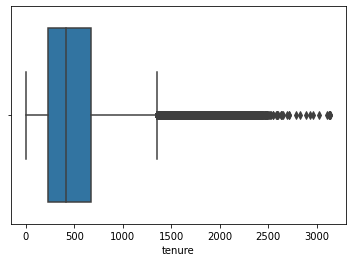

In [27]:
sn.boxplot(fb_data['tenure'])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

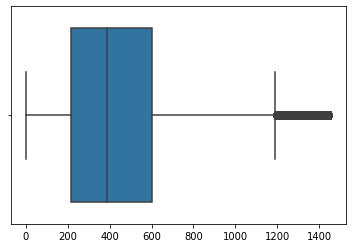

In [28]:
sn.boxplot(rem_out(fb_data['tenure']))

---
<a name = Section7></a>
# **7. Data Post-Profiling**
---

- This section is emphasised on getting a report about the data after the data manipulation.



In [29]:
pre_profile = pandas_profiling.ProfileReport(fb_data)
pre_profile.to_file(output_file="Profiling_after_processing.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

---
<a name = Section8></a>
# **8. Exploratory Data Analysis**
---

- This section is emphasised on asking the right questions and perform analysis using the data.



In [30]:
fb_data.columns

Index(['userid', 'age', 'dob_day', 'dob_year', 'dob_month', 'gender', 'tenure',
       'friend_count', 'friendships_initiated', 'likes', 'likes_received',
       'mobile_likes', 'mobile_likes_received', 'www_likes',
       'www_likes_received'],
      dtype='object')

# Observation

- Male user presence on Facebook is higher, comprising about 59.3% of total users.

<AxesSubplot:ylabel='userid'>

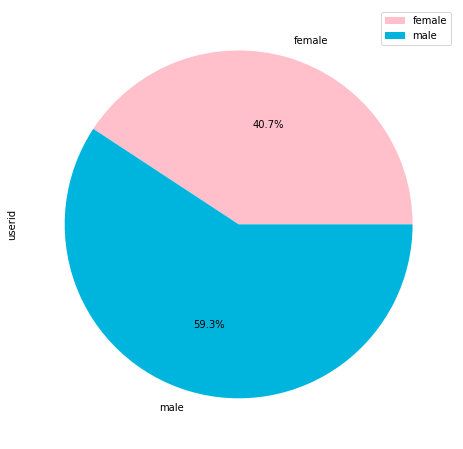

In [11]:
fb_data.groupby(['gender']).sum().plot(kind='pie',colors = ['pink', '#00B5DD'],  y='userid', figsize=[18,8], autopct='%1.1f%%')

#fb_data.gender.plot(kind='pie',  figsize=[18,8])

# Observation

- Females users have a higher percentage of like on Facebook and most of the likes are from mobile users.
- Male users are high but in the likes number females are clear winners

C:\Users\DELL\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Like  Distribution')

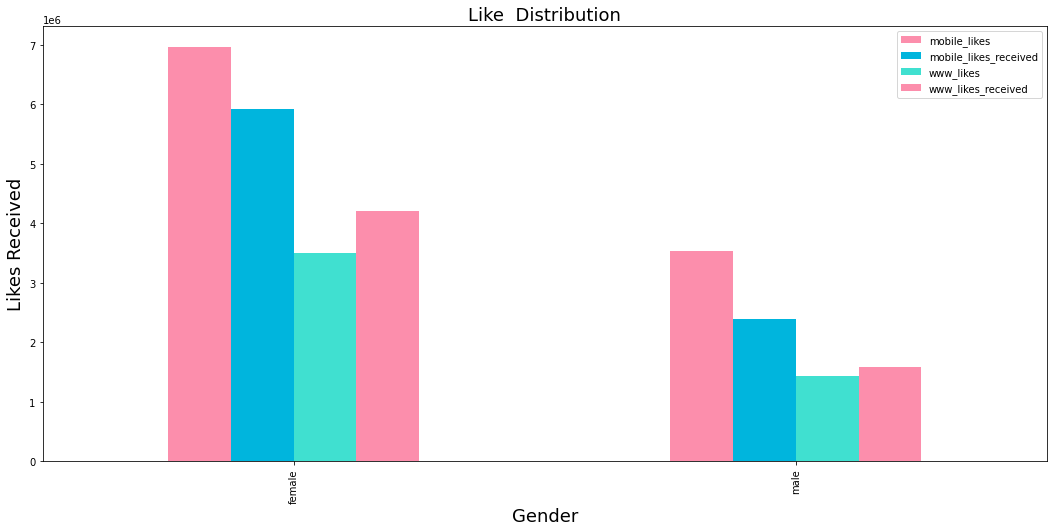

In [16]:
ax=fb_data.groupby(by='gender')['mobile_likes','mobile_likes_received','www_likes','www_likes_received'].sum().plot(kind='bar', color=["#fc8eac","#00B5DD",'#40e0d0'],  figsize=[18,8])
ax.set_xlabel("Gender", size=18)
ax.set_ylabel("Likes Received", size=18)
ax.set_title("Like  Distribution", size=18)

C:\Users\DELL\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Friendships Request Initiated')

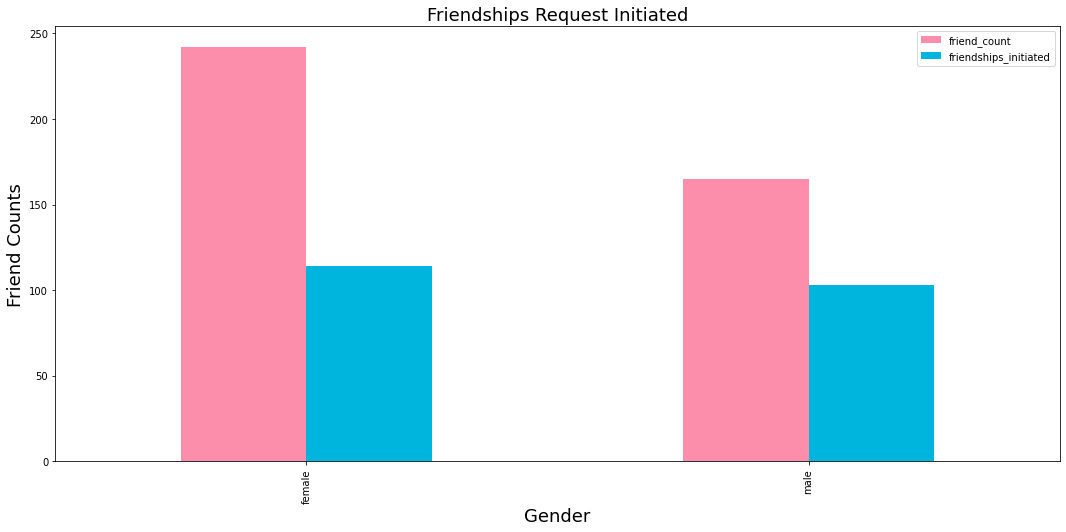

In [15]:
ax=fb_data.groupby(by='gender')['friend_count','friendships_initiated'].mean().plot(kind='bar', color=["#fc8eac","#00B5DD",'green'],  figsize=[18,8])
ax.set_xlabel("Gender", size=18)
ax.set_ylabel("Friend Counts", size=18)
ax.set_title("Friendships Request Initiated", size=18)

In [ ]:
ax=fb_data.groupby(by='gender')['friend_count','www_likes_received'].mean().plot(kind='bar', color=["#fc8eac","Blue",'green'],  figsize=[18,8])
ax.set_xlabel("Gender", size=18)
ax.set_ylabel("Likes Received", size=18)
ax.set_title("Like Distribution", size=18)

# Observation:
       
    - It is observed 85% of entire users have Zero likes


C:\Users\DELL\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Platform vise Like Distribution')

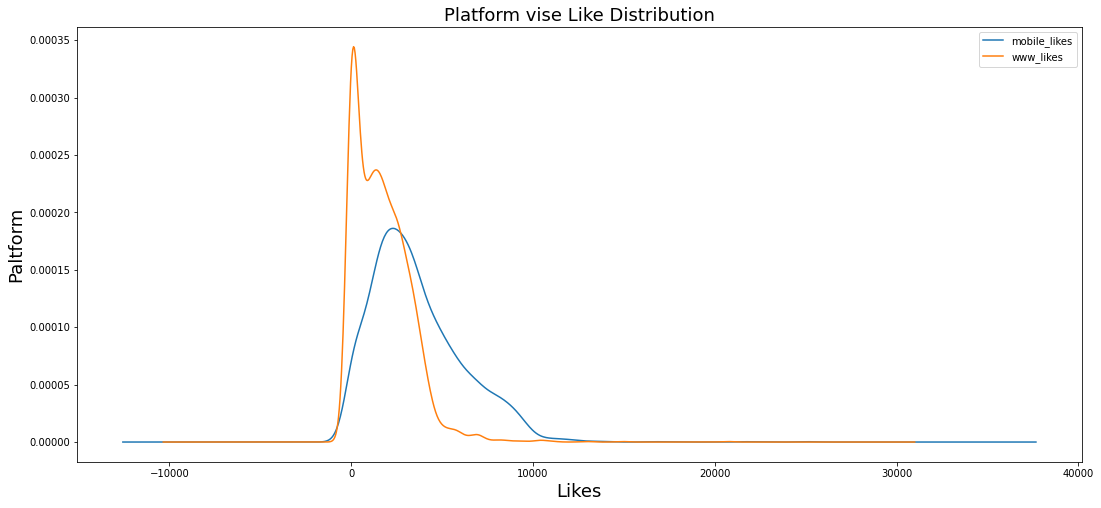

In [83]:
ax=fb_data.groupby(by='likes')['mobile_likes','www_likes'].sum().plot(kind='kde',   figsize=[18,8])
ax.set_xlabel("Likes", size=18)
ax.set_ylabel("Paltform", size=18)
ax.set_title("Platform vise Like Distribution", size=18)

# Observation

- Males are leading in initiating friend requests.

Text(0.5, 1.0, 'Friendship Request Initiated')

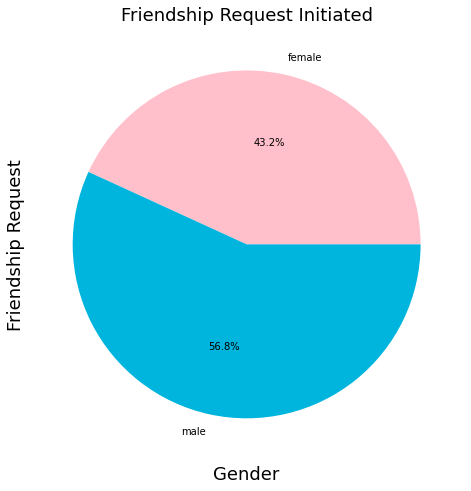

In [10]:
ax=fb_data.groupby(by='gender')['friendships_initiated'].sum().plot(kind='pie',colors = ['pink', '#00B5DD'],y='userid',  figsize=[18,8], autopct='%1.1f%%')
ax.set_xlabel("Gender", size=18)
ax.set_ylabel("Friendship Request", size=18)
ax.set_title("Friendship Request Initiated", size=18)

# Observation

- User age is within 20-25 are highest also there is a slight jump in user base after age of 50.

<AxesSubplot:ylabel='Density'>

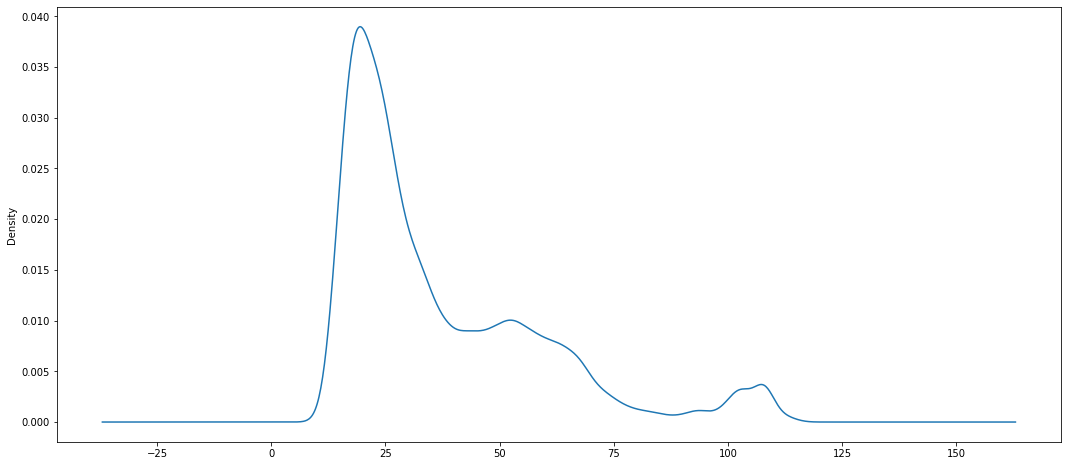

In [12]:
fb_data.groupby(by='userid')['age'].sum().plot(kind='kde',  figsize=[18,8])

<AxesSubplot:xlabel='dob_year'>

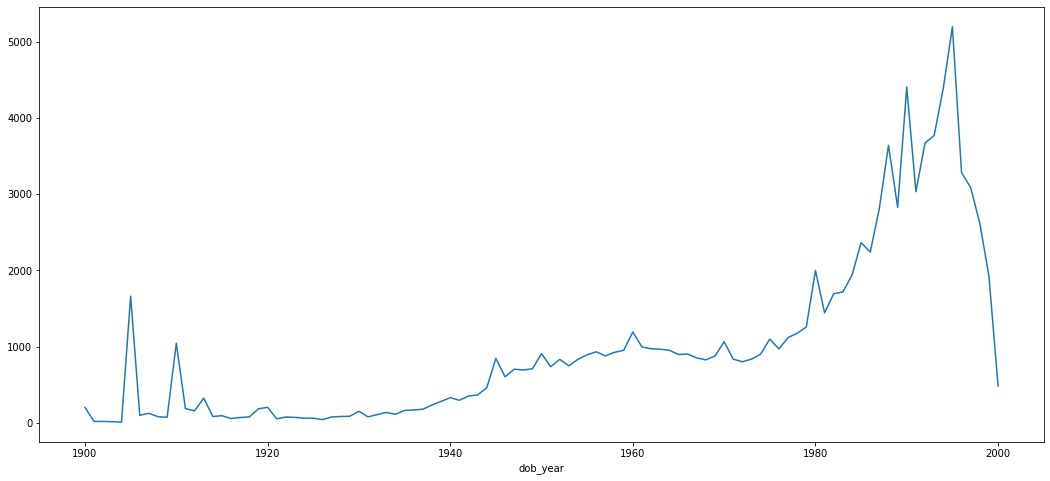

In [81]:

fb_data.groupby(by='dob_year')['userid'].agg('count').plot(kind='line',  figsize=[18,8])

In [2]:
pwd

'C:\\Users\\DELL'